<a href="https://colab.research.google.com/github/RS-Sowmya/Learning/blob/main/flight_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
upload = files.upload()

Saving Airplane_Cleaned.csv to Airplane_Cleaned.csv


##what variables indicate
Model / Company → Identifier and manufacturer (categorical features).

Engine Type → Jet, turboprop, piston, electric, etc. (categorical, affects thrust & performance).

Multi Engine → Yes/No (affects redundancy, climb performance, weight).

TP mods (Thrust/Power modifications) → Config changes like afterburner, prop efficiency upgrades.

THR (Thrust) → Propulsive force from engine (main factor for acceleration, climb, Vmax).

SHP (Shaft Horsepower) → For turboprops/piston engines (alternate to thrust, linked to propeller).

Length, Height, Wing Span → Aircraft geometry, affects aerodynamics & stability.

FW (Fuel Weight) → How much fuel is carried, directly linked to range and endurance.

MEW (Manufacturer Empty Weight) → Basic aircraft structure without fuel/payload.

AUW (All-Up Weight / Max Takeoff Weight) → Fully loaded aircraft (MEW + FW + payload).

Vmax (Maximum Speed) → Top achievable speed (linked to thrust-to-weight ratio, drag).

Vcruise (Cruise Speed) → Optimal long-duration speed (tradeoff between fuel economy and time).

Vstall (Stall Speed) → Minimum steady flight speed (depends on wing loading & aerodynamics).

Hmax (Max Ceiling) → Max operational altitude.

Hmax (One) → Ceiling with one engine inoperative (multi-engine reliability measure).

ROC (Rate of Climb) → Speed of altitude gain (depends on excess thrust/power).

ROC (One) → Rate of climb with one engine out.

Vlo (Landing Gear Operating Speed) → Max speed at which landing gear can be safely extended/retracted.

Slo (Landing Gear Operating Distance) → Runway length needed for landing gear operations.

Vl (Landing Speed) → Approach/landing speed.

Sl (Landing Distance) → Required runway length.

Range → Max flight distance with available fuel.
#dependent and independent variables
Independent Variables (Inputs): Geometry, Engine, Weight, Fuel.

Dependent Variables (Outputs): Speed, Range, ROC, Hmax, Stall speed, etc.


##Relation between variables
Weight vs Performance

AUW ↑ → Vstall ↑, ROC ↓, Range ↓.

FW ↑ → Range ↑ (to a point), but AUW ↑ → Vstall ↑.

Geometry vs Flight

Wing Span ↑ → Lower Vstall (better lift), higher Range (if induced drag ↓).

Length & Height relate more to stability than directly to performance.

Power vs Speed

THR/SHP ↑ → Vmax ↑, ROC ↑, Hmax ↑.

Fuel vs Range

FW ↑ → Range ↑, but limited by drag/weight.

Engines vs Safety

Multi Engine → allows Hmax (One), ROC (One) > 0.

Single Engine → Hmax (One) & ROC (One) = 0.

In [2]:
df = pd.read_csv('Airplane_Cleaned.csv')

In [3]:
df.head()

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,NaN,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,NaN,450.0,NaN,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,NaN,600.0,NaN,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,NaN,650.0,NaN,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Aeronca,Piston,NaN,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,NaN,620.0,NaN,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Aeronca,Piston,NaN,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,NaN,370.0,NaN,632.0,NaN,885.0,NaN,175.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  381 non-null    object 
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        846 non-null    float64
 8   Height        843 non-null    float64
 9   Wing Span     856 non-null    float64
 10  FW            855 non-null    float64
 11  MEW           840 non-null    float64
 12  AUW           857 non-null    float64
 13  Vmax          817 non-null    float64
 14  Vcruise       838 non-null    float64
 15  Vstall        762 non-null    float64
 16  Hmax          827 non-null    float64
 17  Hmax (One)    361 non-null    float64
 18  ROC           798 non-null    

In [5]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, zscore
df.describe(include = "all")

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
count,860,860,860,381,860,156.000000,704.000000,846.000000,843.000000,856.000000,...,762.000000,827.000000,361.000000,798.000000,373.000000,738.000000,719.000000,735.000000,687.000000,815.000000
unique,857,67,3,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AT-602,Cessna Aircraft Company,Piston,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,204,609,381,801,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,5605.551282,315.879972,34.558117,11.353895,41.418536,...,59.818241,25191.499395,16479.257618,1635.652882,618.056300,1987.726287,1415.902643,1686.582313,985.186317,1085.884663
std,NaN,NaN,NaN,NaN,NaN,4203.397212,214.009730,15.372754,4.502104,11.502419,...,15.454400,11137.451560,6983.813924,1155.191210,448.743927,1123.920622,1175.510293,702.014133,669.577823,1019.685481
min,NaN,NaN,NaN,NaN,NaN,280.000000,60.000000,17.583333,5.083333,16.000000,...,27.000000,850.000000,1400.000000,360.000000,160.000000,350.000000,125.000000,300.000000,200.000000,117.000000
25%,NaN,NaN,NaN,NaN,NaN,2950.000000,180.000000,25.166667,8.250000,35.395833,...,50.000000,16400.000000,11350.000000,920.000000,300.000000,1282.000000,800.000000,1220.000000,595.000000,541.500000
50%,NaN,NaN,NaN,NaN,NaN,3700.000000,260.000000,28.500000,9.666667,37.083333,...,57.000000,21500.000000,15800.000000,1250.000000,440.000000,1667.500000,1023.000000,1519.000000,750.000000,746.000000
75%,NaN,NaN,NaN,NaN,NaN,6748.000000,327.500000,36.625000,14.000000,44.500000,...,71.000000,30200.000000,23000.000000,1847.500000,800.000000,2222.250000,1500.000000,2078.000000,1120.000000,1189.000000


In [10]:
df_1.isnull().sum()

,0
AUW,3
Vstall,98
ROC,62
Range,45


In [11]:
#for now lets cover null values with mean
df_1['Vstall'].fillna(df_1['Vstall'].mean(), inplace=True)
df_1['ROC'].fillna(df_1['ROC'].mean(), inplace=True)
df_1['Range'].fillna(df_1['Range'].mean(), inplace=True)
df_1['AUW'].fillna(df_1['AUW'].mean(), inplace=True)
df_1.isnull().sum()

/tmp/ipython-input-2184626958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Vstall'].fillna(df_1['Vstall'].mean(), inplace=True)
/tmp/ipython-input-2184626958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Vstall'].fillna(df_1['Vstall'].mean(), inplace=True)
/tmp/ipython-input-2184626958.py:3: FutureWarning: A value is t

,0
AUW,0
Vstall,0
ROC,0
Range,0


/tmp/ipython-input-1239743430.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Vstall"])
/tmp/ipython-input-1239743430.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["ROC"])
/tmp/ipython-input-1239743430.py:11: UserWarning: 

`distplot` is a deprecated function and will be rem

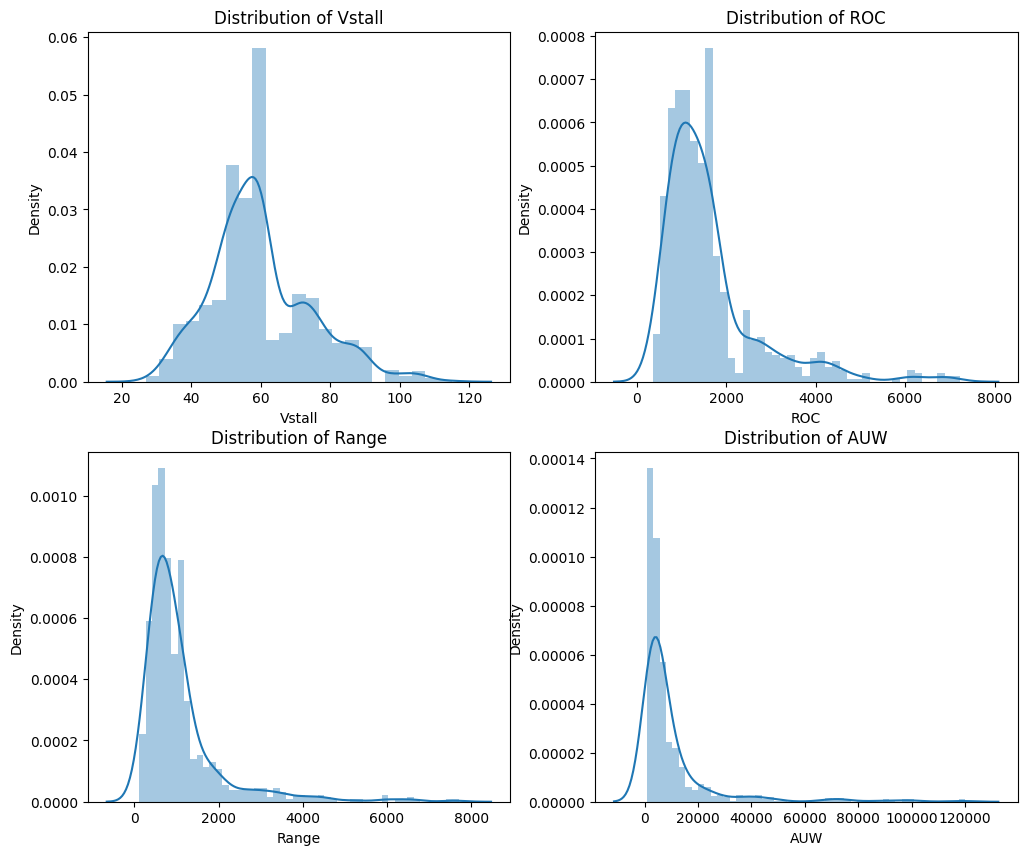

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.distplot(df_1["Vstall"])
plt.title("Distribution of Vstall")
plt.subplot(2,2,2)
sns.distplot(df_1["ROC"])
plt.title("Distribution of ROC")
plt.subplot(2,2,3)
sns.distplot(df_1["Range"])
plt.title("Distribution of Range")
plt.subplot(2,2,4)
sns.distplot(df_1["AUW"])
plt.title("Distribution of AUW")
plt.show()

In [9]:
##Weight vs Performance
#AUW ↑ → Vstall ↑, ROC ↓, Range ↓.
df_1 = df[['AUW', 'Vstall', 'ROC', 'Range']]
df_1.head()

,AUW,Vstall,ROC,Range
0,2050.0,46.0,450.0,370.0
1,1350.0,44.0,600.0,190.0
2,1300.0,37.0,650.0,210.0
3,1300.0,37.0,620.0,210.0
4,1220.0,33.0,370.0,175.0


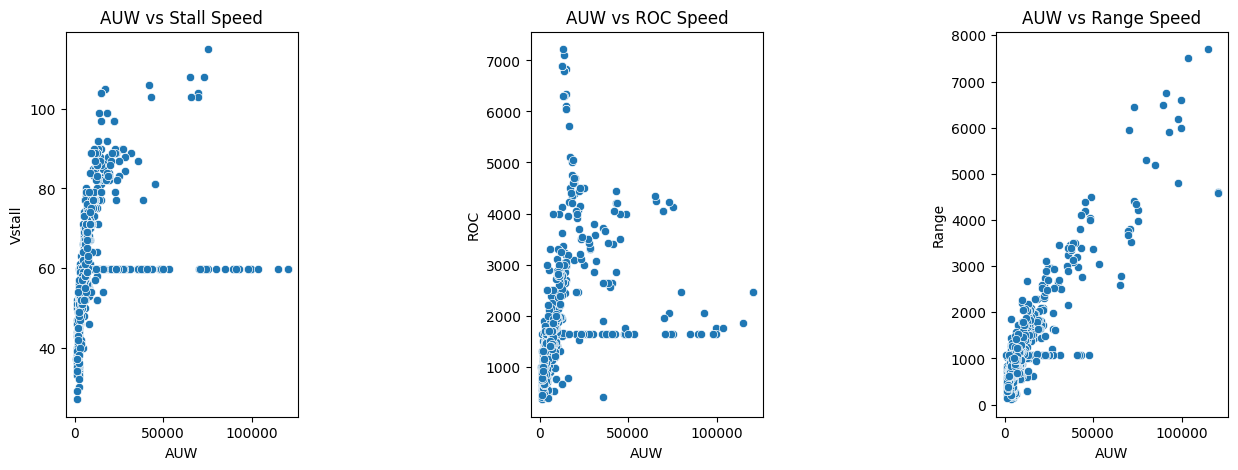

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_1, x="AUW", y="Vstall")
plt.title("AUW vs Stall Speed")
plt.subplot(1,3,2)
sns.scatterplot(data=df_1, x="AUW", y="ROC")
plt.title("AUW vs ROC Speed")
plt.subplot(1,3,3)
sns.scatterplot(data=df_1, x="AUW", y="Range")
plt.title("AUW vs Range Speed")
plt.subplots_adjust(wspace=1)
plt.show()

In [25]:
#AUW vs Range Speed is good to work on linear regression
data_1 = df[['AUW','Range']]
data_1['AUW'].fillna(data_1['AUW'].mean(), inplace=True)
data_1['Range'].fillna(data_1['Range'].mean(), inplace=True)

train_input = np.array(data_1.AUW[1:501]).reshape(500,1)
train_output = np.array(data_1.Range[1:501]).reshape(500,1)
test_input = np.array(data_1.AUW[501:850]).reshape(349,1)
test_output = np.array(data_1.Range[501:850]).reshape(349,1)

/tmp/ipython-input-3869421910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_1['AUW'].fillna(data_1['AUW'].mean(), inplace=True)
/tmp/ipython-input-3869421910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['AUW'].fillna(data_1['AUW'].mean(), inplace=True)
/tmp/ipython-input-3869421910.py:4: FutureWarning: A value is tryin

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_input, train_output)

LinearRegression()

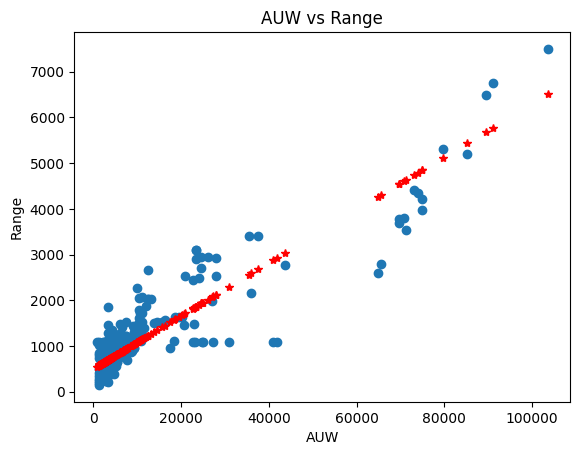

In [31]:
predictions = lr_model.predict(test_input)
plt.scatter(test_input, test_output)
plt.plot(test_input, predictions, color='red')
plt.title('AUW vs Range')
plt.xlabel('AUW')
plt.ylabel('Range')
plt.show()